# starting data preperation 
we will look into the interaction patterns of data. several areas will be looked at.
### user data
- users interactions with streams (see if there are single use, multiple revisits)
- popularity of streams overtime (look into the distributions of users watching streams, if there are trends in user interactions)
- look at stream availability over time. what time they are posted and consumed. whether they are watched often or consumed once and then done. 

In [1]:
# importing the data
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


file_path = os.path.join(os.getcwd(),'Datasets/100k_a.csv')
cols = ["user","stream","streamer","start","stop"]
data = pd.read_csv(file_path, header=None, names=cols)
data.user = pd.factorize(data.user)[0]+1
data['streamer_raw'] = data.streamer
data.streamer = pd.factorize(data.streamer)[0]+1
data[['start_norm', 'stop_norm']] = MinMaxScaler().fit_transform(data[['start', 'stop']])
print("Num users: ", data.user.nunique())
print("Num streamers: ", data.streamer.nunique())
print("Num interactions: ", len(data))
#data is in ten minute intervals over 43 days

Num users:  100000
Num streamers:  162625
Num interactions:  3051733


## looking at user streamer interactions 



In [2]:
#repeat consumption plot
#for a user, for interactions, add start time to streamer array, 
#if streamer array doesn't equal zero means previous consumption
#get the time difference and add it to the specified interval
data.sort_values(by=['user', 'start'], inplace=True)

user_groups = data.groupby('user')
items_array = np.array([(0,0)]*(max(data['streamer'])+1))
time_array = np.zeros(max(data['start']))

for user, user_df in user_groups:
    for interaction, row in user_df.iterrows():
        start = row['start']
        item = row['streamer']
        stream = row['stream']
        if 0 == items_array[item][0]:
        
            items_array[item] = start, stream

            
        else:
            if stream != items_array[item][1]:
                interval = - int(items_array[item][0] - start)
                items_array[item] = start, stream
                time_array[interval] += 1
    #print(f'user {user} done')
    
#takes roughly 3-4 minutes




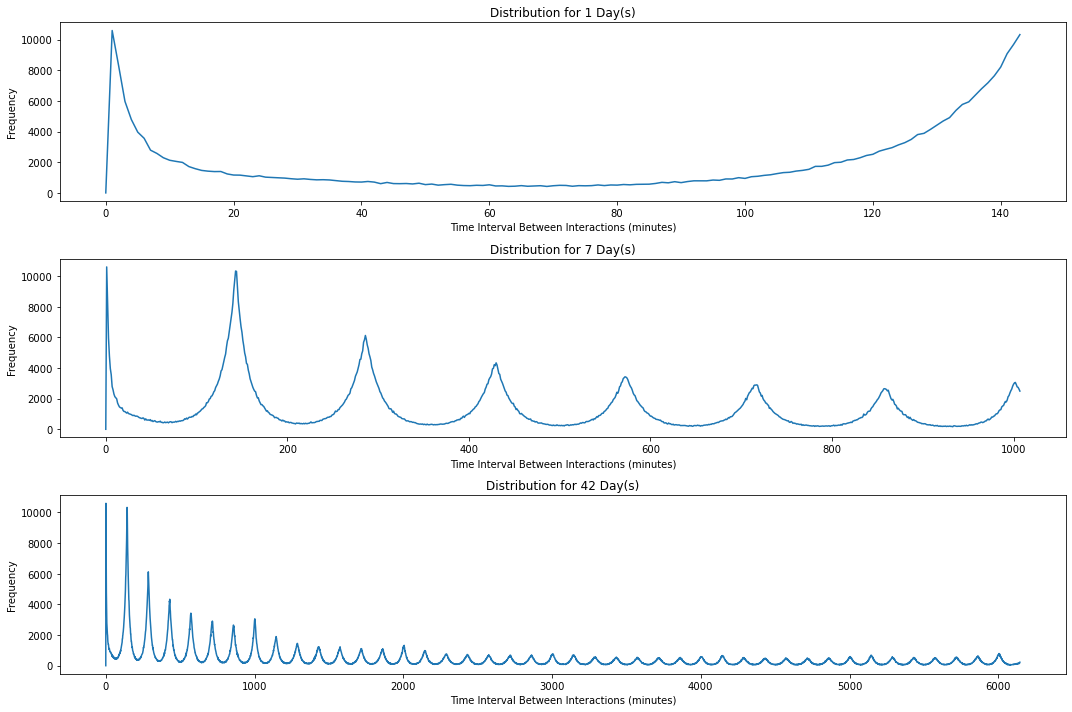

In [3]:
time_lengths = [24*6, 24*6*7, len(time_array) - 1]  # One day, 30 days, and 90 days

plt.figure(figsize=(15, 10))

# Loop through the defined time lengths
for i, length in enumerate(time_lengths, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    plt.plot(time_array[:length])
    plt.xlabel('Time Interval Between Interactions (minutes)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution for {length // (24*6)} Day(s)')
    plt.tight_layout()

plt.show()


### analysis of repeat consumption

can see that the users interact at similar times in the day and watch the same streamers around similar times in the day. They also tend to repeatedly consume withink the first 2-3 days where we can see a spike in consumer repetition. 

Looking at the variety of streamers a user watches 

most common number of unique items [(5, 9161)]


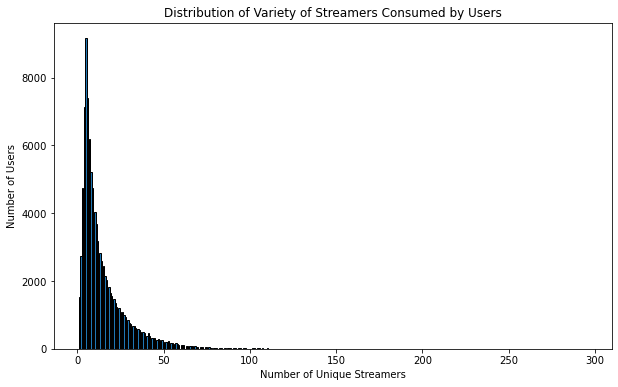

In [4]:
from collections import Counter
streamers_per_user = user_groups['streamer'].nunique()
print(f'most common number of unique items {Counter(streamers_per_user).most_common(1)}')

# Histogram of unique streamers per user
plt.figure(figsize=(10, 6))
plt.hist(streamers_per_user, bins=400, edgecolor='black')
plt.xlabel('Number of Unique Streamers')
plt.ylabel('Number of Users')
plt.title('Distribution of Variety of Streamers Consumed by Users')
plt.show()

In [5]:
#looking at if trends change with users who have watched a lot of streams 
#and users who have watched a few.
#first get the quartiles of users interactiosn and split users into groups around the upper
#and lower quartiles 
interaction_counts = user_groups.size()
# Find the user with the most interactions
max_i_c = interaction_counts.max()
interaction_counts = interaction_counts.sort_values()

lower_quartile, upper_quartile = interaction_counts[:int(0.25 * len(interaction_counts))], interaction_counts[int(0.75 * len(interaction_counts)):]
lower_quartile_data = data[data['user'].isin(lower_quartile.index)].copy()
upper_quartile_data = data[data['user'].isin(upper_quartile.index)].copy()


### upper quatile analysis

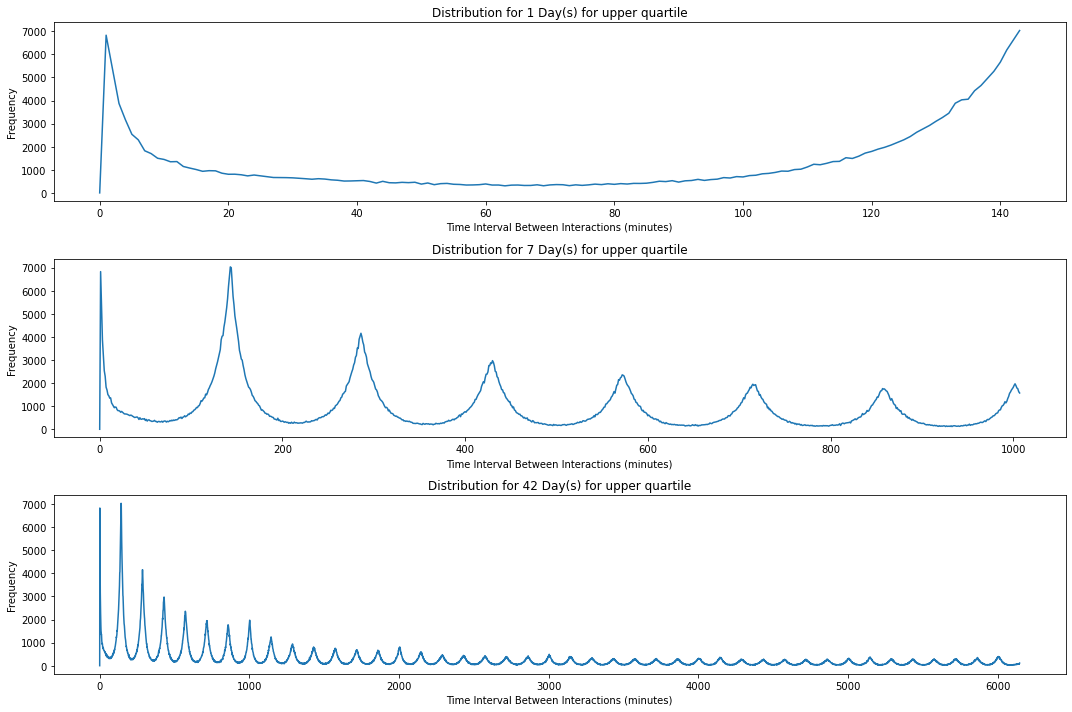

In [6]:
upper_quartile_data.sort_values(by=['user', 'start'], inplace=True)

uq_user_groups = upper_quartile_data.groupby('user')
uq_items_array = np.array([(0,0)]*(max(upper_quartile_data['streamer'])+1))
uq_time_array = np.zeros(max(upper_quartile_data['start']))

for user, user_df in uq_user_groups:
    for interaction, row in user_df.iterrows():
        start = row['start']
        item = row['streamer']
        stream = row['stream']
        if 0 == uq_items_array[item][0]:
        
            uq_items_array[item] = start, stream

            
        else:
            if stream != uq_items_array[item][1]:
                interval = - int(uq_items_array[item][0] - start)
                uq_items_array[item] = start, stream
                uq_time_array[interval] += 1
    #print(f'user {user} done')
    
#takes roughly 3-4 minutes

time_lengths = [24*6, 24*6*7, len(uq_time_array) - 1]  # One day, 30 days, and 90 days

plt.figure(figsize=(15, 10))

# Loop through the defined time lengths
for i, length in enumerate(time_lengths, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    plt.plot(uq_time_array[:length])
    plt.xlabel('Time Interval Between Interactions (minutes)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution for {length // (24*6)} Day(s) for upper quartile')
    plt.tight_layout()

plt.show()

most common number of unique items [(26, 893)]


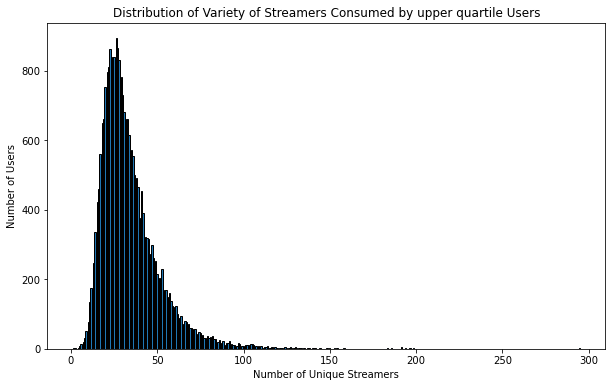

In [7]:
from collections import Counter
uq_streamers_per_user = uq_user_groups['streamer'].nunique()
print(f'most common number of unique items {Counter(uq_streamers_per_user).most_common(1)}')

# Histogram of unique streamers per user
plt.figure(figsize=(10, 6))
plt.hist(uq_streamers_per_user, bins=400, edgecolor='black')
plt.xlabel('Number of Unique Streamers')
plt.ylabel('Number of Users')
plt.title('Distribution of Variety of Streamers Consumed by upper quartile Users')
plt.show()

### lower quartile analysis


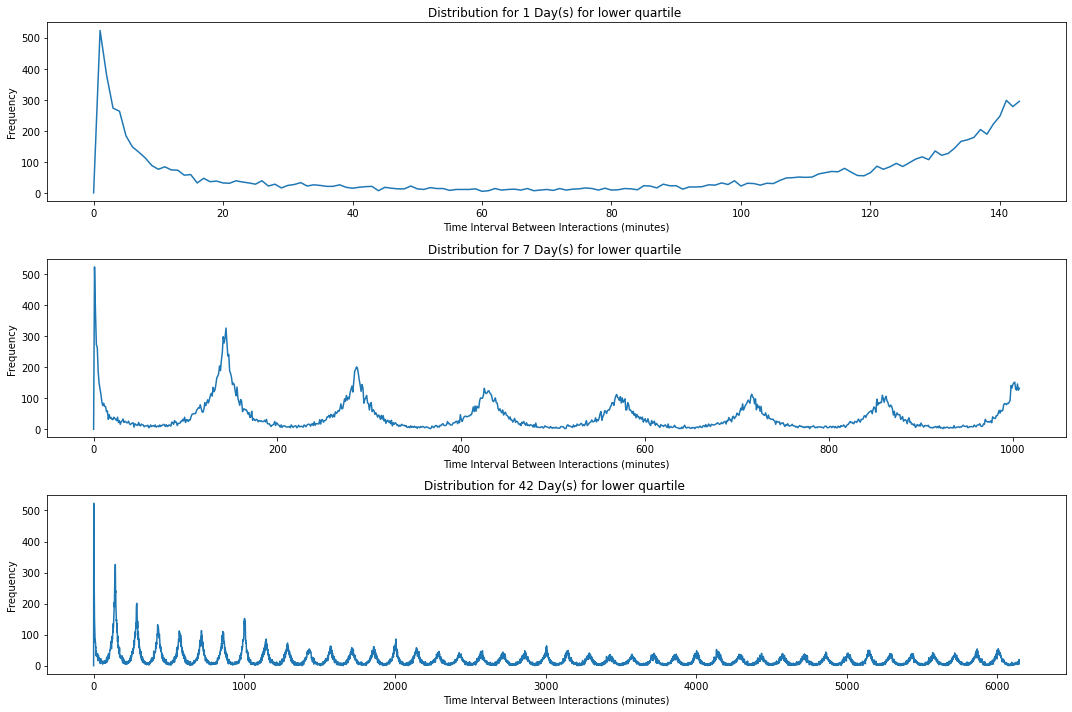

In [39]:
lower_quartile_data.sort_values(by=['user', 'start'], inplace=True)

lq_user_groups = lower_quartile_data.groupby('user')
lq_item_array = np.array([(0,0)]*(max(lower_quartile_data['streamer'])+1))
time_array_lq = np.zeros(max(lower_quartile_data['start']))
lq_streamers_per_user = np.zeros()
for user, user_df in lq_user_groups:
    for interaction, row in user_df.iterrows():
        start = row['start']
        item = row['streamer']
        stream = row['stream']
        if 0 == lq_item_array[item][0]:
        
            lq_item_array[item] = start, stream

            
        else:
            if stream != lq_item_array[item][1]:
                interval = - int(lq_item_array[item][0] - start)
                lq_item_array[item] = start, stream
                time_array_lq[interval] += 1
    #print(f'user {user} done')
    
#takes roughly 3-4 minutes

time_lengths = [24*6, 24*6*7, len(time_array_lq) - 1]  # One day, 30 days, and 90 days

plt.figure(figsize=(15, 10))

# Loop through the defined time lengths
for i, length in enumerate(time_lengths, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    plt.plot(time_array_lq[:length])
    plt.xlabel('Time Interval Between Interactions (minutes)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution for {length // (24*6)} Day(s) for lower quartile ')
    plt.tight_layout()

plt.show()

most common number of unique items in the lower quartile 0.0002


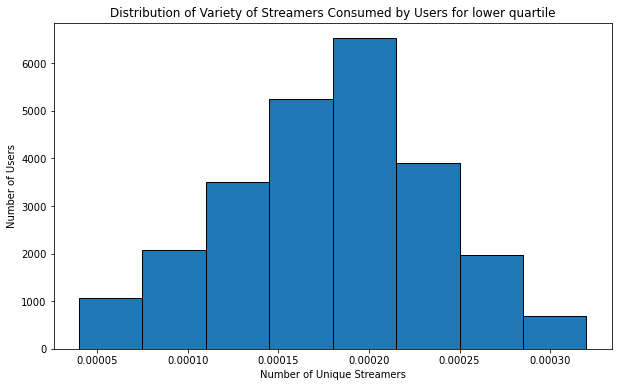

In [62]:
from collections import Counter
print(f'most common number of unique items in the lower quartile {Counter(lq_streamers_per_user).most_common(1)[0][0]}')

# Histogram of unique streamers per user
plt.figure(figsize=(10, 6))
plt.hist(lq_streamers_per_user, bins=8, edgecolor='black')
plt.xlabel('Number of Unique Streamers')
plt.ylabel('Number of Users')
plt.title('Distribution of Variety of Streamers Consumed by Users for lower quartile')
plt.show()

## stream availability analysis 

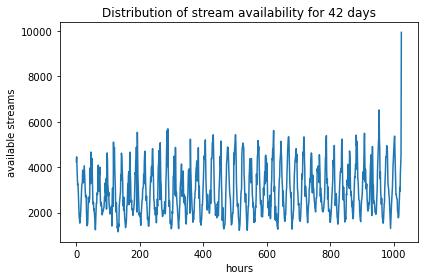

In [37]:
time_frame = 6
availability = [0] * (max(data.start)//time_frame)
for i, row in data.iterrows():
    time = row['start']
    day = time//time_frame - 1
    stream = row['stream']
    availability[day] += 1
    
plt.plot(availability)
plt.ylabel('available streams')
plt.xlabel('hours')
plt.title(f'Distribution of stream availability for 42 days')
plt.tight_layout()
plt.show()
# takes roughly 3 minutes

we can see that our numbers of unique streamers is significantly different for users with large viewership vs users with small viewership 

In [58]:
from scipy import stats

# Assuming data1 and data2 are your two datasets
U1, p_value = stats.mannwhitneyu(lq_streamers_per_user, uq_streamers_per_user)
nx, ny = len(lq_streamers_per_user), len(uq_streamers_per_user)


print(U1, p_value)
#as we can see our P value is less then most hypothesis values such as 0.05-0.01 so we can accept that between the qurtiles there is a large difference in data


321804.0 0.0
